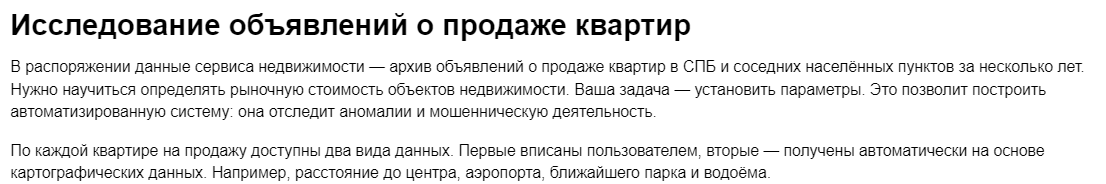

In [1]:
#Библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Откройте файл с данными и изучите общую информацию. 

In [2]:
data = pd.read_csv('......', sep='\t')
data.info()
data.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12311,20,2360000.0,48.5,2018-07-17T00:00:00,2,2.50,3.0,26.6,2,NaN,...,10.4,1.0,посёлок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,276.0
16652,6,6070000.0,64.0,2016-05-27T00:00:00,2,2.75,5.0,37.0,1,NaN,...,12.0,0.0,Пушкин,18450.0,30604.0,1.0,397.0,1.0,524.0,97.0
21917,11,3800000.0,44.6,2018-08-18T00:00:00,2,NaN,5.0,30.4,4,NaN,...,7.0,NaN,Санкт-Петербург,42365.0,9857.0,3.0,510.0,1.0,565.0,59.0
8693,12,4200000.0,39.3,2019-03-26T00:00:00,1,2.65,12.0,20.1,2,NaN,...,8.5,NaN,Санкт-Петербург,33673.0,14772.0,0.0,NaN,1.0,204.0,18.0
18755,17,5800000.0,42.8,2018-06-14T00:00:00,1,2.70,25.0,15.0,15,NaN,...,9.0,1.0,Санкт-Петербург,51514.0,15486.0,0.0,NaN,1.0,571.0,98.0
718,13,1600000.0,33.9,2018-07-30T00:00:00,1,2.60,5.0,20.0,1,NaN,...,6.0,NaN,поселок городского типа Советский,NaN,NaN,NaN,NaN,NaN,NaN,174.0
6987,7,4200000.0,43.3,2018-11-18T00:00:00,2,NaN,5.0,NaN,2,NaN,...,NaN,NaN,посёлок Левашово,52693.0,25727.0,0.0,NaN,0.0,NaN,61.0
20092,11,8900000.0,97.0,2017-11-10T00:00:00,4,2.70,12.0,63.0,3,NaN,...,15.0,2.0,Санкт-Петербург,35716.0,12630.0,1.0,430.0,1.0,189.0,414.0
12909,20,7000000.0,70.1,2018-07-17T00:00:00,2,2.54,16.0,32.6,7,NaN,...,12.9,NaN,Санкт-Петербург,26041.0,13364.0,0.0,NaN,0.0,NaN,106.0
21544,10,14400000.0,105.3,2017-02-17T00:00:00,3,3.06,6.0,57.2,3,NaN,...,19.2,NaN,Санкт-Петербург,27154.0,5856.0,1.0,350.0,1.0,178.0,643.0


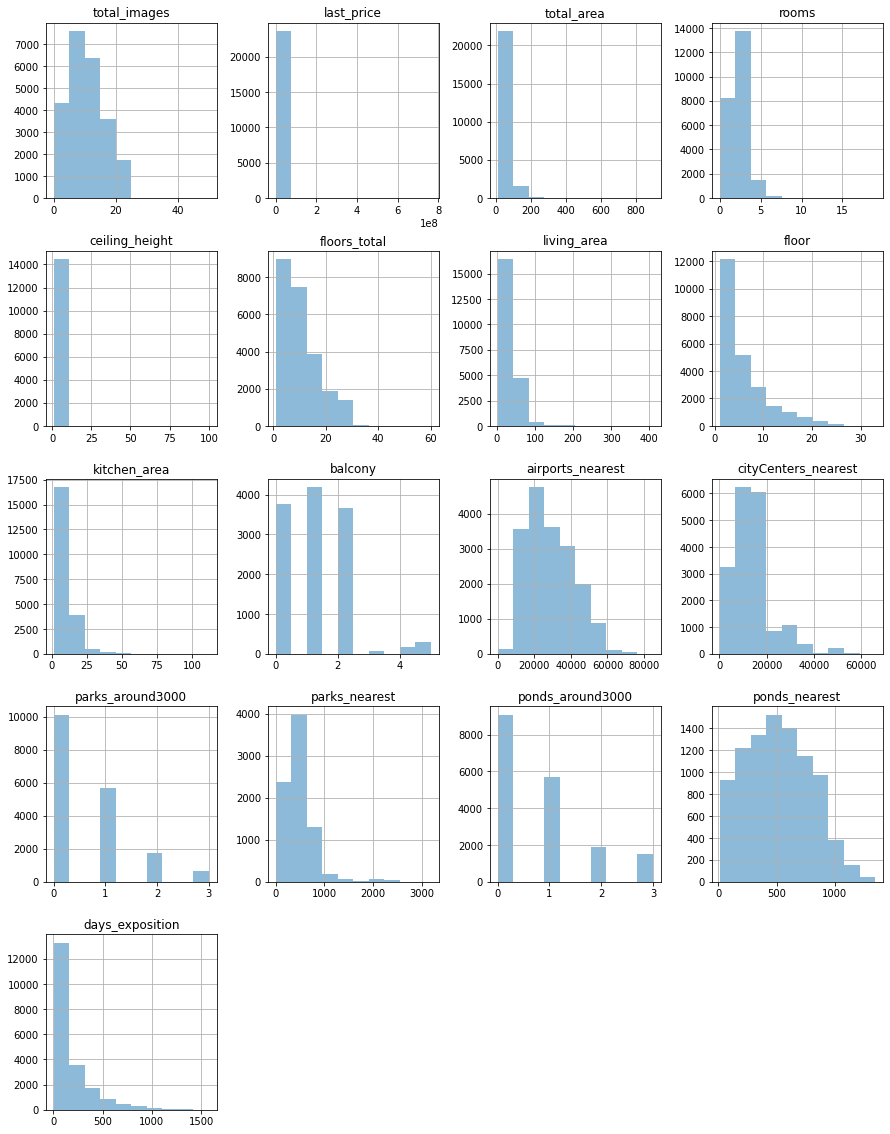

In [3]:
data.hist(figsize=(15, 20), alpha=0.5)
None

После прочтения файла видим:
- размер датасета  23699 строки на 22 столбца
- достаточно много пропусков в столбцах
(ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition)
- есть столбцы с явно неправильным типом данных
(first_day_exposition, floors_total, is_apartment, balcony, parks_around3000, ponds_around3000, days_exposition)
- есть столбцы с неудобными названиями

### Предобработка данных

In [4]:
# Изменим названия столбцов
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 
             'parks_around3000': 'parks_around_3km', 'ponds_around3000': 'ponds_around_3km'})
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3km', 'parks_nearest', 'ponds_around_3km',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [5]:
# Функция проверки пропусков
def check_nan(column):
    print('Количество пропусков в столбце',column,  data[column].isna().sum())
    print()
    print(data[column].describe())

In [6]:
print("Количество даных, которыми можно пренебречь в случае невозможности заполнения", round(data.shape[0]*0.03,0))

Количество даных, которыми можно пренебречь в случае невозможности заполнения 711.0


In [7]:
# Проверим пропуски  и аномалии в ceiling_height
check_nan('ceiling_height')

Количество пропусков в столбце ceiling_height 9195

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


<AxesSubplot:>

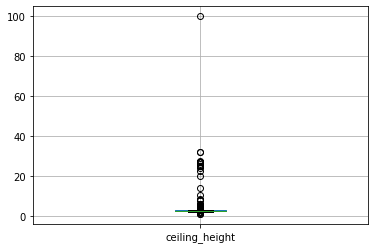

In [8]:
data.boxplot('ceiling_height')

<AxesSubplot:>

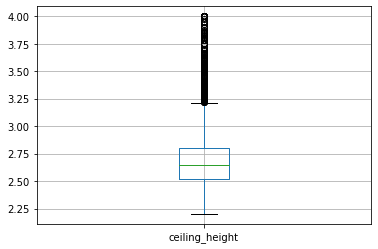

In [9]:
# Избавимся от аномалий
data.loc[(data['ceiling_height']>4) | (data['ceiling_height']<2.2), 'ceiling_height'] = data['ceiling_height'].median()
data.boxplot('ceiling_height')

In [10]:
# Заменим пропуски 
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['ceiling_height'].isna().sum()

0

Вероятная причина пропуска в данной графе - продавец не указал высоту потолка(возможно не знает). Логичнее всего заменить на медианную высоту, та что чаще встречается. Также на медианные значения были заменены аномали, встречающиеся в данной выборке.

In [11]:
# Проверим пропуски в is_apartment
print(data['is_apartment'].unique())
data['is_apartment'].isna().sum()

[nan False True]


20924

Как и в случае с высотой потолка, продавец мог не указать информацию о юр.статусе недвижимости. Поскольку это булевое значение и мы не знаем наверняка, то лучше оставить пропуск, что будет означать "нет данных"

In [12]:
# Проверим пропуски в balcony
check_nan('balcony')
data['balcony'].unique()

Количество пропусков в столбце balcony 11519

count    12180.000000
mean         1.150082
std          1.071300
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64


array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [13]:
# Изменим тип данных и заменим пропуски на 0(балкона в квартире может и не быть)
data['balcony'] = data['balcony'].fillna(0).astype('int')
data['balcony'].isna().sum()

0

Пропуске в графе балконов скорее всего говорят об отсутствии их, по скольку это не обязательный конструктивный элемент здания)) Соответственно пропуски заполняем нулями.

In [14]:
# Проверим пропуски в floors_total
check_nan('floors_total')

Количество пропусков в столбце floors_total 86

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


In [15]:
# Заменим пропуски 

data.loc[data['floors_total']<=data['floors_total'].median()
         , 'floors_total'] = data['floors_total'].median()

data['floors_total'] = data['floors_total'].fillna(data['floor']).astype('int')
data['floors_total'].isna().sum()

0

Возможной причиной пропусков может служить покупатель или невозможность автоматически подгрузить данные из другой системы из-за отсутствия адреса. Если заменить на середнее, то велика вероятность большой погрешности из за большого разброса(от 1 до 60 эт).
Вариант замены медианой в данной ситуации больше привлекает, однако тоже может привести к неточности если квартира будет находится выше этажности дома. Принято решение в случае если квартира находится ниже медиааной этажности заменитьна медиану, если выше, то меняем на номер этажа(предполагая что квартира находится на последнем этаже). 

In [16]:
# Заменим пропуски в локации
data['locality_name'] = data['locality_name'].fillna('нет данных')
data['locality_name'].isna().sum()

0

Пропуски в локации меняем на "нет данных" ибо взять эти данные действительно негде

In [17]:
# Заменим пропуски в значения медиан
nan_list = ['airports_nearest', 'city_centers_nearest', 'parks_around_3km', 'parks_nearest', 'ponds_around_3km', 'ponds_nearest']
for i in nan_list:
    data[i] = data[i].fillna(data[i].median())

data[['parks_around_3km', 'ponds_around_3km']] = data[['parks_around_3km', 'ponds_around_3km']].astype('int')    
data[nan_list].isna().sum()    

airports_nearest        0
city_centers_nearest    0
parks_around_3km        0
parks_nearest           0
ponds_around_3km        0
ponds_nearest           0
dtype: int64

В виду того, что эти данные подгружаются автоматически из другой системы, можно предположить что пропуски связаны с отсутствием адреса. Данные меняем на медианы поскольку чаще всего в жилой застройке есть инфраструктура и +/- расстояния до прков и водоемов стандартно определяются проектом генплана.

In [18]:
# Проверим пропуски в living_area
check_nan('living_area')

Количество пропусков в столбце living_area 1903

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64


In [19]:
# Заменим пропуски на медианы
data['living_area'] = data['living_area'].fillna(data['living_area'].median())
data['living_area'].isna().sum()

0

In [20]:
# Проверим пропуски в kitchen_area
check_nan('kitchen_area')

Количество пропусков в столбце kitchen_area 2278

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64


In [21]:
#Изменим тип данных для is_apartment
data['is_apartment'] = data['is_apartment'].astype('bool')

# Заменим часть пропусков на медианы
data.loc[(~data['is_apartment']==1) | (data['rooms']>0)
         , 'kitchen_area'] = data[(~data['is_apartment']==1) | (data['rooms']>0)]['kitchen_area'].median()

# Остальные заменим на 0
data['kitchen_area'] = data['kitchen_area'].fillna(0)
data['kitchen_area'].isna().sum()

0

Пропуски в данной графе могут быть связаны с особенностями современной планировки. Например в апартаментах и квартирах свободной планировки четко не обозначается площадь кухни. В связи с этим принято решение заменить в апартаментах и квартирах свободной планировки площадь на 0, а в остальных случаях на мелианное значение.

In [22]:
# Проверим пропуски в days_exposition
check_nan('days_exposition')

Количество пропусков в столбце days_exposition 3181

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64


In [23]:
# Заменим формат данных
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [24]:
# Проверим данные на явные дубликаты
data.duplicated().sum()

0

In [25]:
# Проверим на неявные дубликаты
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [26]:
# переименуем
data['locality_name'] = data['locality_name'].str.replace(
    'ё','е').str.replace(
    'поселок городского типа','пгт').str.replace(
    'коттеджный поселок','кп').str.replace(
    'городской поселок','пгт').str.replace(
    'садовое товарищество','снт').str.replace(
    'садоводческое некоммерческое товарищество','снт')

In [27]:
# соберем датасет тип административной территории и имя
localy_type_list = ['пгт', 'кп', 'снт', 'поселок', 'село', 'деревня', 'нет данных']
localy = data['locality_name'].str.lower().str.split(expand=True, n=1)
localy.columns = ['locality_type','locality_name_only']
localy.loc[~(localy['locality_type'].isin(localy_type_list)),
           'locality_name_only']= localy[~localy['locality_type'].isin(localy_type_list)]['locality_type']
localy.loc[~localy['locality_type'].isin(localy_type_list),'locality_type']= 'город'
localy.sample(10)

,locality_type,locality_name_only
12393,город,санкт-петербург
20677,город,санкт-петербург
2102,город,выборг
132,город,петергоф
20611,город,санкт-петербург
7036,поселок,парголово
11252,город,колпино
3470,город,санкт-петербург
9314,город,санкт-петербург
12482,город,санкт-петербург


In [28]:
data = data.join(localy)
data.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition,locality_type,locality_name_only
17064,14,1050000.0,28.2,2018-09-25,1,2.65,9,13.4,2,True,...,Новая Ладога,26726.0,13098.5,0,455.0,1,502.0,91.0,город,новая
20138,19,3800000.0,39.1,2018-06-17,1,2.60,9,20.1,4,True,...,Санкт-Петербург,39368.0,14652.0,0,455.0,0,502.0,35.0,город,санкт-петербург
15184,20,7300000.0,81.1,2018-07-20,3,2.65,9,50.6,3,True,...,Петергоф,39346.0,34535.0,2,221.0,1,611.0,115.0,город,петергоф
2541,14,6500000.0,61.4,2019-04-28,3,2.70,9,43.8,3,True,...,Санкт-Петербург,50101.0,15065.0,0,455.0,0,502.0,NaN,город,санкт-петербург
6003,20,4890000.0,40.7,2018-12-18,1,2.70,17,20.0,13,True,...,Санкт-Петербург,34631.0,14499.0,0,455.0,1,987.0,30.0,город,санкт-петербург
14139,12,4200000.0,45.0,2018-04-17,2,2.60,9,30.0,5,True,...,Санкт-Петербург,27763.0,12043.0,2,493.0,0,502.0,278.0,город,санкт-петербург
12412,0,3300000.0,27.0,2017-08-15,0,2.65,25,25.0,22,True,...,Санкт-Петербург,12199.0,12111.0,0,455.0,1,337.0,161.0,город,санкт-петербург
6636,0,4150000.0,62.0,2017-05-23,3,2.65,12,41.0,3,True,...,Колпино,26941.0,32727.0,1,1354.0,2,384.0,36.0,город,колпино
17210,11,3100000.0,30.0,2017-06-22,1,2.65,9,15.1,5,True,...,Санкт-Петербург,42365.0,9857.0,3,510.0,1,565.0,8.0,город,санкт-петербург
13923,14,7990000.0,81.0,2017-10-26,3,2.65,12,52.0,6,False,...,Санкт-Петербург,30855.0,7925.0,0,455.0,2,724.0,70.0,город,санкт-петербург


<AxesSubplot:>

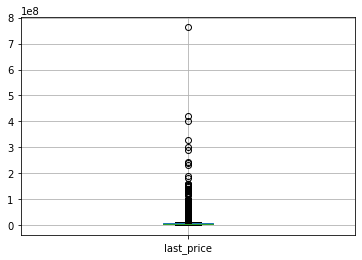

In [29]:
data.boxplot('last_price')

In [30]:
last_price_limit = data['last_price'].quantile(0.99)
last_price_limit

36000000.0

In [31]:
data = data.query('last_price <= @last_price_limit')
data['last_price'] = data['last_price'].astype('int')

У столбца с первым днем публикации формат данных был object, так работать с данными в дальнейшем не получится. Меняем формат на datetime

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23463 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23463 non-null  int64         
 1   last_price            23463 non-null  int64         
 2   total_area            23463 non-null  float64       
 3   first_day_exposition  23463 non-null  datetime64[ns]
 4   rooms                 23463 non-null  int64         
 5   ceiling_height        23463 non-null  float64       
 6   floors_total          23463 non-null  int64         
 7   living_area           23463 non-null  float64       
 8   floor                 23463 non-null  int64         
 9   is_apartment          23463 non-null  bool          
 10  studio                23463 non-null  bool          
 11  open_plan             23463 non-null  bool          
 12  kitchen_area          23463 non-null  float64       
 13  balcony         

Предобработка данных завершена, можно приступать к анализу.

### Посчитайте и добавьте в таблицу новые столбцы

In [33]:
# цена одного квадратного метра;
data['sm_price'] = round(data['last_price']/data['total_area'],2)

# день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
data['wd_exp'] = pd.DatetimeIndex(data['first_day_exposition']).weekday

# месяц публикации объявления;
data['mth_exp'] = pd.DatetimeIndex(data['first_day_exposition']).month

# год публикации объявления;
data['yr_exp'] = data['first_day_exposition'].astype('datetime64[Y]')

# расстояние до центра города в километрах (переведите из м в км и округлите до целых значений)
data['cty_cent_nearest_km'] = round(data['city_centers_nearest']/1000,0)

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3km,ponds_nearest,days_exposition,locality_type,locality_name_only,sm_price,wd_exp,mth_exp,yr_exp,cty_cent_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,2,755.0,NaN,город,санкт-петербург,120370.37,3,3,2019-01-01,16.0
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,True,...,0,502.0,81.0,поселок,шушары,82920.79,1,12,2018-01-01,19.0
2,10,5196000,56.0,2015-08-20,2,2.65,9,34.3,4,True,...,2,574.0,558.0,город,санкт-петербург,92785.71,3,8,2015-01-01,14.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,1,48.0,121.0,город,санкт-петербург,100000.00,1,6,2018-01-01,8.0
5,10,2890000,30.4,2018-09-10,1,2.65,12,14.4,5,True,...,1,502.0,55.0,пгт,янино-1,95065.79,0,9,2018-01-01,13.0


In [34]:
def floor_group(row): 
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другое'

In [35]:
data['floor_type'] = data.apply(floor_group, axis=1)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,locality_type,locality_name_only,sm_price,wd_exp,mth_exp,yr_exp,cty_cent_nearest_km,floor_type
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,755.0,NaN,город,санкт-петербург,120370.37,3,3,2019-01-01,16.0,другое
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,True,...,502.0,81.0,поселок,шушары,82920.79,1,12,2018-01-01,19.0,первый
2,10,5196000,56.0,2015-08-20,2,2.65,9,34.3,4,True,...,574.0,558.0,город,санкт-петербург,92785.71,3,8,2015-01-01,14.0,другое
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,48.0,121.0,город,санкт-петербург,100000.00,1,6,2018-01-01,8.0,другое
5,10,2890000,30.4,2018-09-10,1,2.65,12,14.4,5,True,...,502.0,55.0,пгт,янино-1,95065.79,0,9,2018-01-01,13.0,другое


### Проведите исследовательский анализ данных

In [36]:
param_list = ['total_area', 'living_area', 'kitchen_area', 
 'last_price', 'rooms', 'ceiling_height', 'floor' 
 , 'floors_total', 'city_centers_nearest', 
 'airports_nearest','parks_nearest', 'wd_exp', 'mth_exp']


def hist(column):
    data.plot(y=column, kind = 'hist', title = column, bins = 40, grid=True, figsize=(7,5), alpha=0.5)
    plt.show()
    None

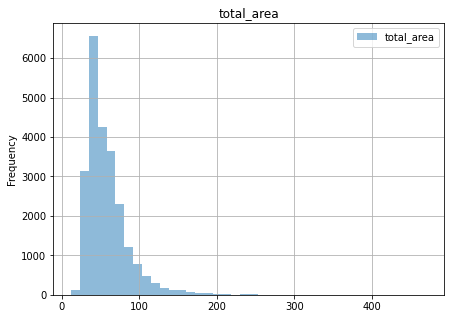

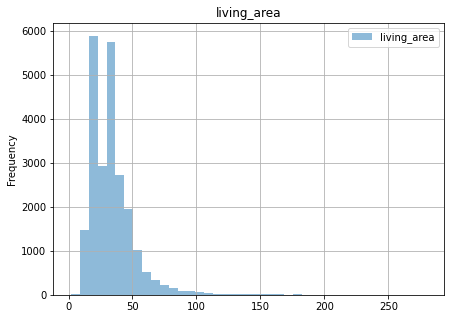

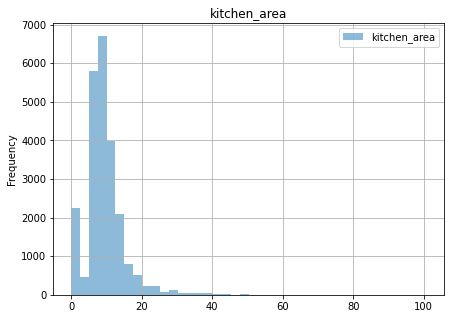

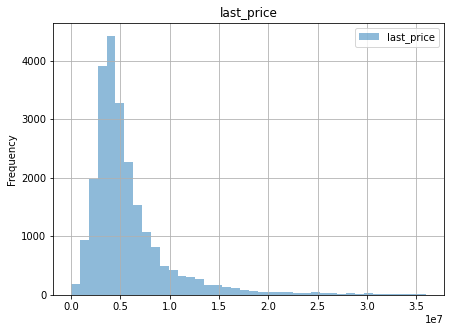

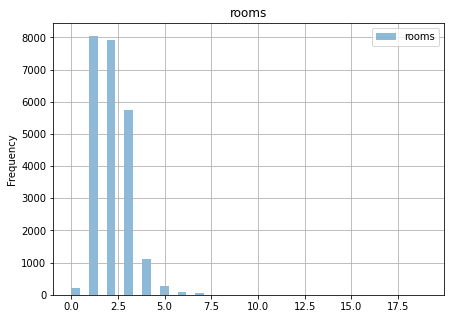

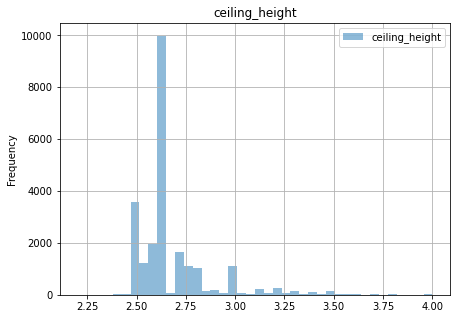

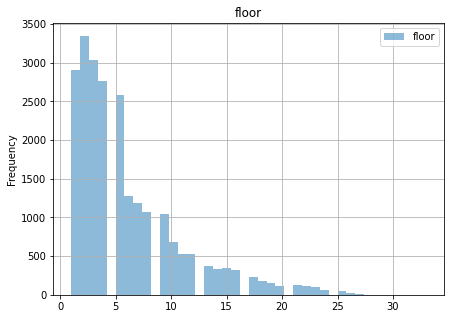

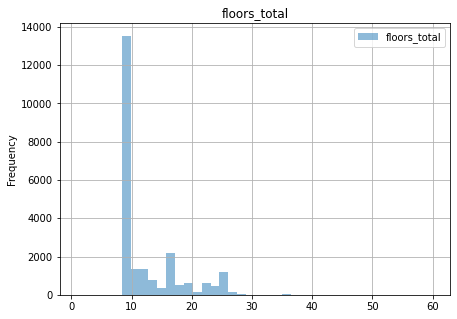

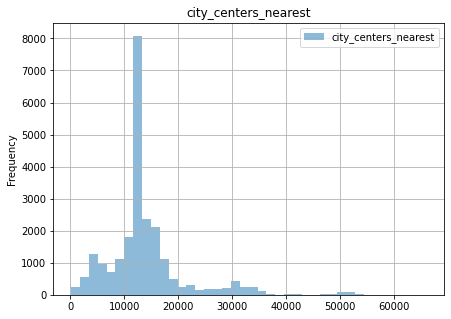

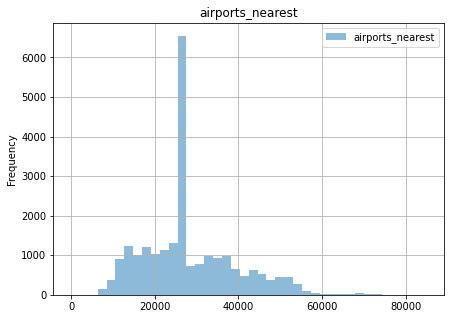

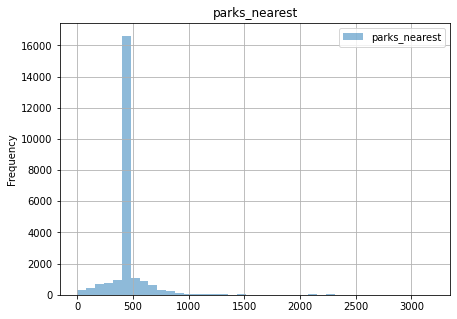

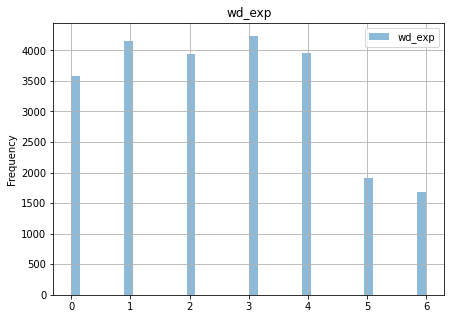

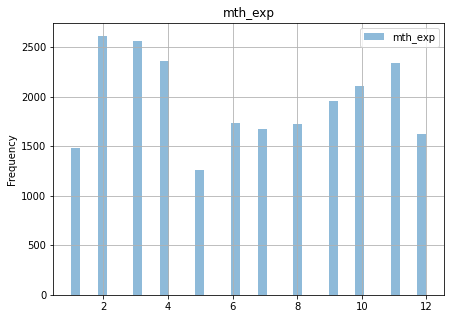

In [37]:
for i in param_list:
    hist(i)

<AxesSubplot:title={'center':'floor_type'}, xlabel='floor_type'>

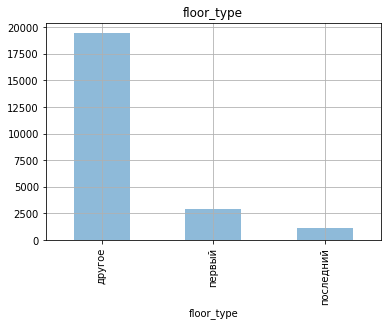

In [38]:
data.groupby('floor_type')['floor'].count().plot(kind='bar', grid=True, alpha=0.5, title = 'floor_type')

Основные инсайты по гистограммам:

- основная часть квартир площадью до 100 м2, в данных есть явне аномалии в промежутке от 200 до 400 м2
- жилая площадь, колеблется от 0 до 400 м2, основная масса в диапозоне от 20 до 100м2
- кухни чаще всего окооло 9 м2, однако встречаются аномалии, стремящиеся к 0. Возможно это связано с наличием объявлений по апартаментам и квартирам свободной планировки.
- количество комнат в большинстве объявлений 1-3, реже всречаются 4-5 и апартаменты/свободная планировка
- потолки чаще встречаются от 2.4м до 3. Самая популярная высота 2.6 м
- гистограммы этажа и этажности не противоречат друг другу, однако видны и аномалии в виде наличия объявлений с 60 этажностью
- в выходные реже публикуются объявления
- в месяца с длительными праздниками публикации бывают реже
- первый и последний этаж в объявлениях встречается реже, что вполне логично

Медиана 95.0
Среднее 179.73861736650605
Количество пропусков в столбце days_exposition 3125

count    20338.000000
mean       179.738617
std        218.856755
min          1.000000
25%         45.000000
50%         95.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64


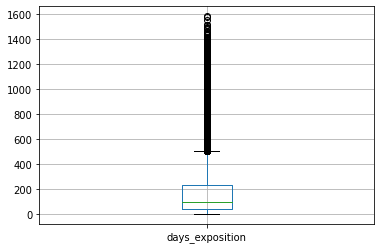

In [39]:
data.boxplot('days_exposition')
print('Медиана', data['days_exposition'].median())
print('Среднее', data['days_exposition'].mean())
check_nan('days_exposition')

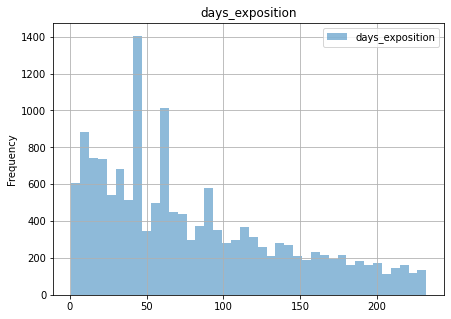

In [40]:
# построим гистограмму, отбпросивы выбросы
data[data['days_exposition']<=232].plot(y='days_exposition', 
                                        kind = 'hist', alpha=0.5, title = 'days_exposition', bins = 40, grid=True, figsize=(7,5))
None

Средней сро продажи квартиры 95 дней. Есть и аномально долгие продажи - больше 200 дней, однако их достаточно малое количество. Быстрыми считаем продажи, попавшие в первый квантиль распределения - 45 дней.

             total_area  living_area  last_price
total_area     1.000000     0.882028    0.789098
living_area    0.882028     1.000000    0.653696
last_price     0.789098     0.653696    1.000000


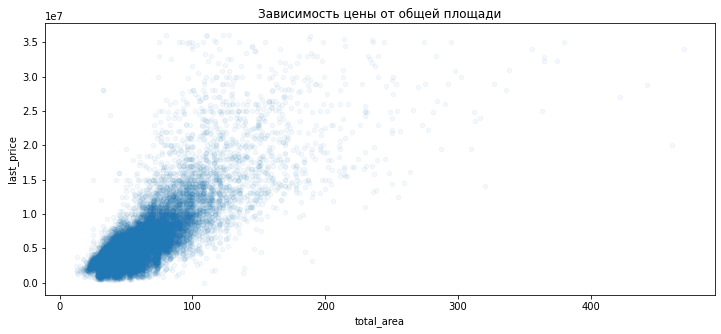

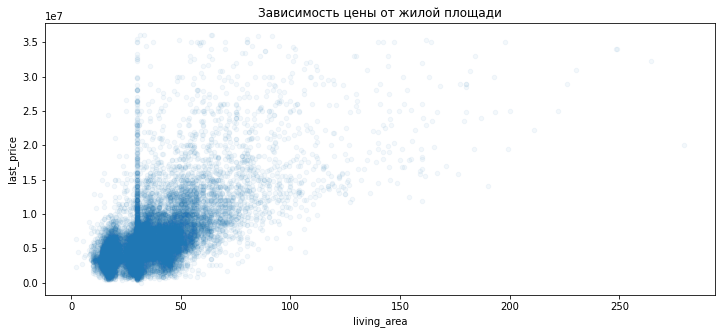

In [41]:
# Зависимость цены от площадей
area_price = data[['total_area', 'living_area', 'last_price']]
print(area_price.corr())
area_price.plot.scatter (y = 'last_price', x = 'total_area', alpha=0.05,figsize=(12, 5),  title = 'Зависимость цены от общей площади')
area_price.plot.scatter (y = 'last_price', x = 'living_area', alpha=0.05, figsize=(12, 5), title = 'Зависимость цены от жилой площади')
None

Зависимость есть в обоих случаях. Коэффициенты корреляции цены к общей площади 0.79 и цены к жилой0.65, то есть зависимость цены от общей площади выше. 
А вот зависимость жилой площади от общее прослеживается еще четче - коэффициент корреляции 0.88))

              kitchen_area  last_price
kitchen_area      1.000000    0.505014
last_price        0.505014    1.000000


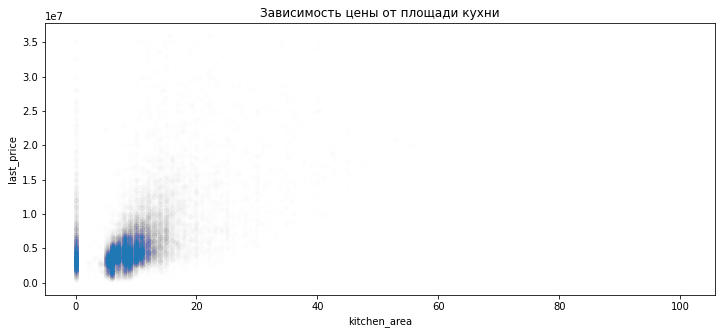

In [42]:
kitchen_price = data[['kitchen_area', 'last_price']]

print(kitchen_price.corr())
kitchen_price.plot.scatter (y = 'last_price', 
                                  x = 'kitchen_area', figsize=(12, 5), alpha=0.005, title = 'Зависимость цены от площади кухни')

None

Коэффициент корреляции цены к площади кухни близок к 0.5, а это значит что зависимость не очень сильная. 

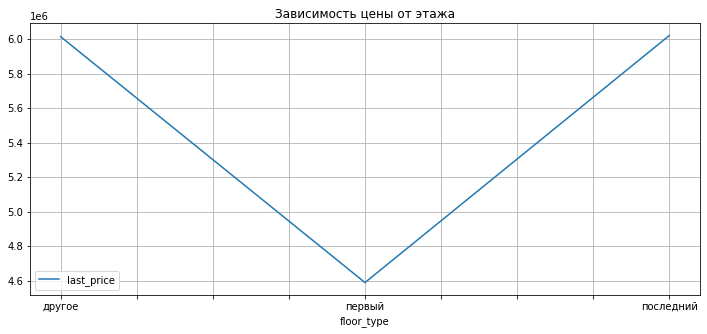

In [43]:
data.pivot_table(index='floor_type', values='last_price').plot(grid=True, figsize=(12, 5), 
                                                          title='Зависимость цены от этажа') 
None

Как оказалось квартиры на первом этаже стоят гораздо дешевле чвоих высоких собратьев. Особенно ценятся квартиры в поднебесье.

In [44]:
data['wd_exp'].describe()

count    23463.000000
mean         2.568129
std          1.789169
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: wd_exp, dtype: float64

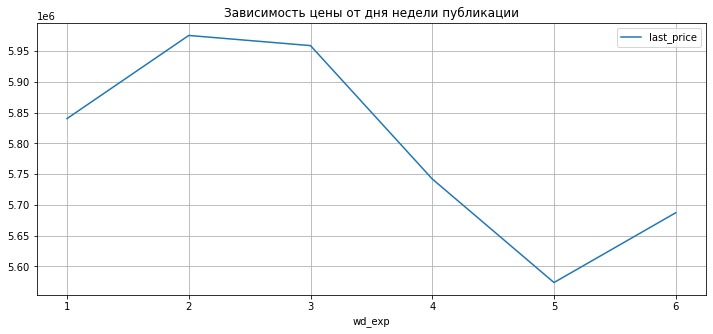

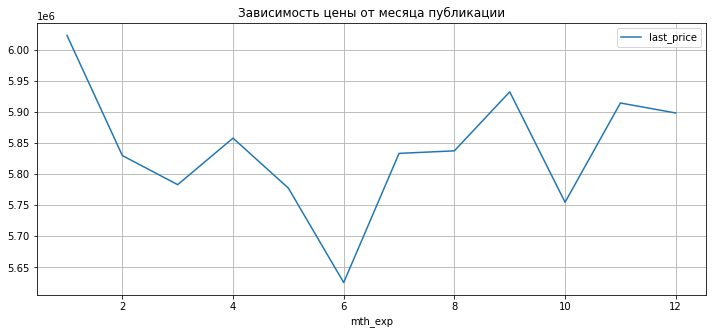

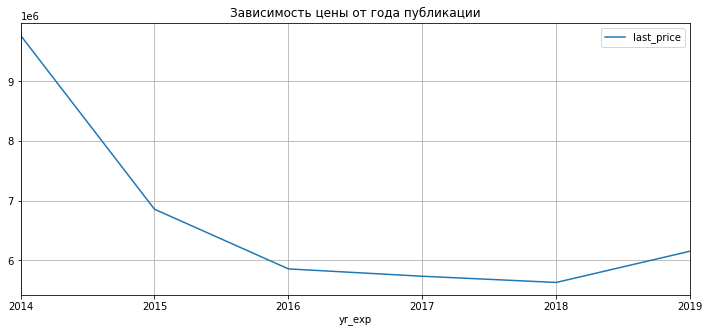

In [45]:
data.query('wd_exp>0').pivot_table(index='wd_exp', values='last_price').plot(grid=True, figsize=(12, 5), 
                                                          title='Зависимость цены от дня недели публикации') 
data.pivot_table(index='mth_exp', values='last_price').plot(grid=True, figsize=(12, 5), 
                                                          title='Зависимость цены от месяца публикации') 
data.pivot_table(index='yr_exp', values='last_price').plot(grid=True, figsize=(12, 5), 
                                                          title='Зависимость цены от года публикации') 
None

Засимость цены от дня недели публикации говорит о том, что по пятницам чаще всего выкладывают объявления с самыми дешевыми квартирами.
График зависимости цены от месяца предстваляет себя в виде ломанной с переменными пиками и падениями. Самые низкие цены  в июне, а в январе самые высокие.
Судя по графику цен с 2014г наблюдается стабильное снижение, возможно это связано с экономическим кризисом.

In [46]:
# Цена за квадратный метр в Топ-10 по количеству объявлений
locality_sm_price = data.pivot_table(index = 'locality_name', aggfunc = {'first_day_exposition':'count', 
                                                     'sm_price':'median'}).sort_values('first_day_exposition'
                                                                                     , ascending = False).reset_index().head(10)
locality_sm_price.columns = ['locality_name', 'qty_exposition', 'sm_price']
locality_sm_price['sm_price'] = round(locality_sm_price['sm_price'],2)

locality_sm_price

,locality_name,qty_exposition,sm_price
0,Санкт-Петербург,15487,104336.04
1,поселок Мурино,556,85878.46
2,поселок Шушары,440,76876.18
3,Всеволожск,398,65789.47
4,Пушкин,368,99993.59
5,Колпино,337,74722.22
6,поселок Парголово,327,91642.86
7,Гатчина,307,67796.61
8,деревня Кудрово,299,91860.47
9,Выборг,237,58158.32


<AxesSubplot:title={'center':'Топ-10 по стоимости за квадратный метр'}, xlabel='locality_name'>

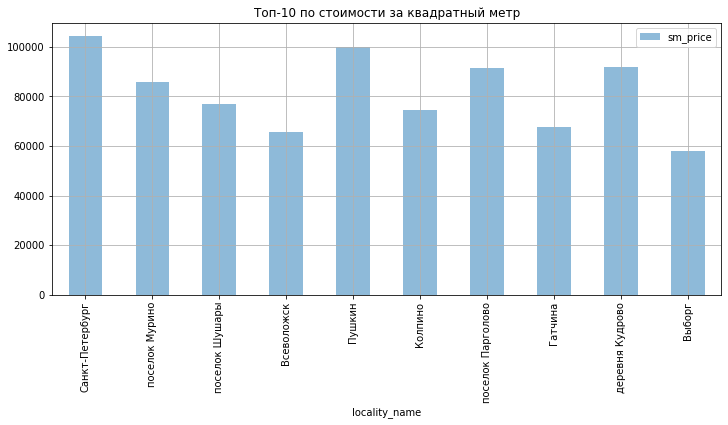

In [47]:
locality_sm_price.plot(x='locality_name', y='sm_price', 
                       kind='bar', grid = True, title = 'Топ-10 по стоимости за квадратный метр',
                       alpha=0.5, figsize=(12, 5))


Лидером по стоимости за квадратный метр и количеству объявлений является Санкт-Петербург 10ку замыкает Выборг.

In [48]:
# Cреднюя цена каждого километра
mean_prise_km = data.query('locality_name_only== "санкт-петербург"').query('cty_cent_nearest_km > 0')
mean_prise_km['price_mean_km'] = mean_prise_km['sm_price']/mean_prise_km['cty_cent_nearest_km']

print('Средняя цена 1 км',round(mean_prise_km['price_mean_km'].median(),2))

Средняя цена 1 км 8616.6


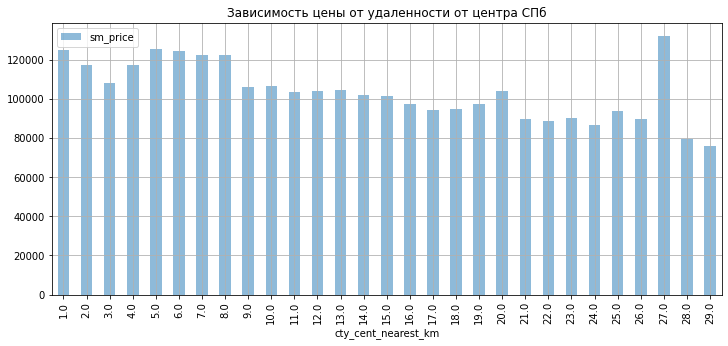

In [50]:
ctr_near_sm_price = mean_prise_km.query('cty_cent_nearest_km > 0'
                              ).pivot_table(index = 'cty_cent_nearest_km',
                                            aggfunc = {'sm_price': 'median'}
                                           ).plot(kind='bar', grid = True, 
                                                  title = 'Зависимость цены от удаленности от центра СПб', 
                                                  alpha=0.5, figsize=(12, 5))


График удаленности показывает тенденцию снижения срдней цены с увеличением километража от центра Северной столицы. Однако наблюдаются периодические "всплески". Есть смысл провести отдельный анализ с учетом класса жилья(эконом, комфорт, элит), инфраструктуры(градообразующие предприятия) и экологической обстановки(предприятия с вредными выбросами, свалки отходов или некачественная вода).

### Общий вывод

В ходе работы над проектом исходные данные прошли довольно масштабную предобработку. Разделение склеенных столбцов, замена пропусков, изменены типы данных согласно содержанию столбцов, проведена категоризация данных, добавлены дополнительные столбцы для удобства дальнейших расчетов и анализа ситуации на рынке жилья. При детальном изучении данных после обработки выяснилось:
1 . популярнее всего в продажах квартиры общей площадью около 100 кв.м и жилой примерно 30 кв.м., средняя цена квартиры 4,65 млн, большинство выставленных на продажу квартир имеют 1-3 комнаты, основная масса продаваемых квартир с высотой потолков 2.5-2.7м. Есть и довольно высокие потолки в 6м, возможно в продаже был лофт)
2. квартиры продаются в среднем от 0 до 8 месяцев. Встречаются достаточно быстрые продажи за 45 дней.
3. выяснили зависимости. На рост цены  влияет площадь, количество комнат, удаленность от центра, этаж. День недели, месяц и год также оказывали влияние на стоимость жилья.
4. проведен анализ топ-10 населенных пунктов по количеству объявлений. Лидером по стоимости за квадратный метр оказался Санкт-Петербург, минимальная цена в данном срезе принадлежит поселку Выборгу.
5. график удаленности квартир от центра СПб показывает тенденцию снижения срдней цены с увеличением километража